# DFS, DFT and FFT

## DFS and DFT as projections on a base of complex sinusoids

In short, using the DFS or the DFT we are projecting a signal of length N on a basis of N complex sinusoids $W_N^{n,k}$ with $k=1,…,N$.

In [1]:
def dftmatrix(N):
    '''construct DFT matrix'''
    import numpy as np
    
    # create a 1xN matrix containing indices 0 to N-1
    a = np.expand_dims(np.arange(N), 0)
    
    # take advantage of numpy broadcasting to create the matrix
    WN = np.exp(-2j*np.pi*a.T*a/N)
    
    return WN

Let's see what happens if we reduce the dimension of the base, that is the number of sinusoids used to represent the signal!
One complex sinusoid (of order 0, i.e. a constant), taken from the first 128 samples of the frequency Representation signal yields:

In [2]:
import numpy as np
x = np.append(np.ones(64),np.zeros(64))
W128 = dftmatrix(128)
X1 = np.dot(W128[0],x)
xx1 = np.real(np.conjugate(W128[:,0])*X1*1/128)

Two,three,... complex sinusoids will be:

In [3]:
X2 = np.dot(W128[0:2],x)
xx2 = np.real(np.dot(np.conjugate(W128[:,0:2]),X2)*1/128)

X3 = np.dot(W128[0:3],x)
xx3 = np.real(np.dot(np.conjugate(W128[:,0:3]),X3)*1/128)

X4 = np.dot(W128[0:4],x)
xx4 = np.real(np.dot(np.conjugate(W128[:,0:4]),X4)*1/128)

X5 = np.dot(W128[0:5],x)
xx5 = np.real(np.dot(np.conjugate(W128[:,0:5]),X5)*1/128)

X6 = np.dot(W128[0:6],x)
xx6 = np.real(np.dot(np.conjugate(W128[:,0:6]),X6)*1/128)

X7 = np.dot(W128[0:7],x)
xx7 = np.real(np.dot(np.conjugate(W128[:,0:7]),X7)*1/128)

X8 = np.dot(W128[0:8],x)
xx8 = np.real(np.dot(np.conjugate(W128[:,0:8]),X8)*1/128)

X9 = np.dot(W128[0:9],x)
xx9 = np.real(np.dot(np.conjugate(W128[:,0:9]),X9)*1/128)

X10 = np.dot(W128[0:10],x)
xx10 = np.real(np.dot(np.conjugate(W128[:,0:10]),X10)*1/128)

X128 = np.dot(W128,x)
xx128 = np.real(np.dot(np.conjugate(W128),X128)*1/128)

and so on, up to considering 10 complex sinusoids. If now we plot the signal representation using 1,2 and up to 10 sinusoids we obtain the following figure:

Populating the interactive namespace from numpy and matplotlib


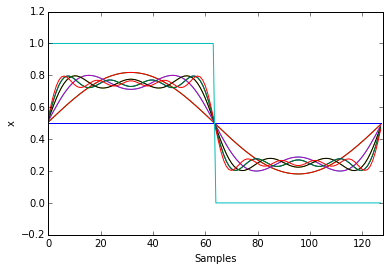

In [4]:
%pylab inline

plot(np.arange(xx1.size),xx1)
plot(np.arange(xx2.size),xx2)
plot(np.arange(xx3.size),xx3)
plot(np.arange(xx4.size),xx4)
plot(np.arange(xx5.size),xx5)
plot(np.arange(xx6.size),xx6)
plot(np.arange(xx7.size),xx7)
plot(np.arange(xx8.size),xx8)
plot(np.arange(xx9.size),xx9)
plot(np.arange(xx10.size),xx10)
plot(np.arange(xx128.size),xx128)
xlabel('Samples'), ylabel('x'), xlim([0,128])
show()

## Three tones

Let us consider another example. We create a simple signal $x$ composed of 3 tones $x1$, $x2$, and $x3$

In [5]:
from scipy import constants as c
y = np.linspace(0,999,1000)
x1 = np.sin((y*2*c.pi*40)/1000)
x2 = np.sin((y*2*c.pi*80)/1000)
x3 = np.sin((y*2*c.pi*160)/1000)

We can put together these signals to get a final signal composed of $N=5000$ samples, with silence in between the 3 different sine waves.

In [6]:
x = np.append(x1,[np.zeros(1000),x2,np.zeros(1000),x3])

Let's generate the Fourier matrix $W_N$ (with N=5000) and compute the DFS or DFT of the signal

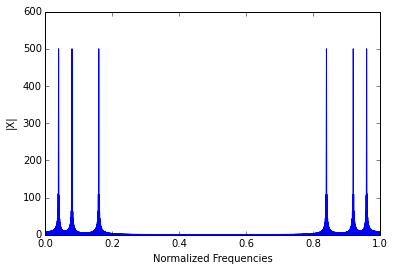

In [7]:
W5000 = dftmatrix(5000)
X = np.dot(W5000,x)
normFrequ = np.arange(1,X.size+1,dtype=float)/float(X.size)
plot(normFrequ,abs(X))
ylabel('|X|'), xlabel('Normalized Frequencies')
show()

where we can clearly see the three tones.

Let's now reduce the base over which the signal is represented, and take:

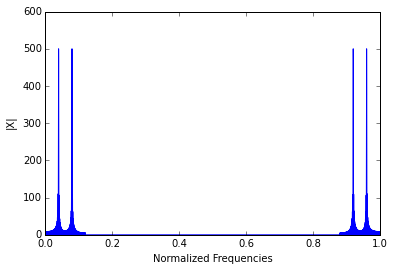

In [8]:
W5000reduced = np.append(W5000[0:600],W5000[4399:5000],axis=0)                 # Selecciona 1201 filas de la matriz original
iW5000reduced = np.conj(np.append(W5000[:,0:600],W5000[:,4399:5000],axis=-1))  # reduce la dimensionalidad del espacio de representación de 5000 a 1201...

Xapprox = np.dot(W5000reduced,x)                # DFT/DFS on a reduced base
xapprox = np.dot(iW5000reduced,Xapprox)*1/5000  # inverse DFT/DFS of the DFT/DFS on a reduced base
xapprox = np.real(xapprox)                      # real value of the result to get rid of imaginary numerical errors

X = np.dot(W5000,xapprox)
plot(np.arange(1,5001,dtype=float)/float(5000),abs(X))
ylabel('|X|'), xlabel('Normalized Frequencies')
show()

## Numerical optimization: Fast Fourier Transform - FFT

If we take a look at the matrix form of the DFS or DFT
$X = W_N x$ # We assume here $W_N$ to have dimensions $N \times N$ and $x$ to have dimensions $N \times 1$

We see that it requires $O(N^2)$ multiplications. As $N$ increases, the computational burden is way too high. Already in the case of the previous example with $N=5000$ the number of multiplication is not negligible.

The Fast Fourier Transform (FFT) is an algorithm that optimizes the computation of the DFS/DFT by reducing the number of multiplications to $2N\log_2N$. Standard FFT algorithm requires $N$ to be a power of 2, and, if it is not the case, the algorithm adds zeros (zero padding) to the signal to reach a number of samples that is a power of 2.

Python implements the Fast Fourier Transform using the following command:

In [9]:
from scipy import fftpack as f
X = f.fft(x)

The fft() function is also optimized with respect to numerical errors.

In the first numerical example presented in Fourier Transform, we have indeed chosen a step function of length 128 so as to fall into the framework of an optimized algorithm w.r.t. the computational burden and the numerical errors.

The FFT function also accepts an additional parameter M enabling to choose how many samples of x are used to compute the FFT

X = scipy.fftpack.fft(x,M)

### Getting familiar with the FFT: Truncating and Zero Padding

Consider a signal $x$ composed of $N$ samples and let's use the function X = fft(x,M) to compute the FFT.

#### Truncating

If $M<N$ then the FFT is computed using the first $M$ samples of $x$.
Let's take another two tones signal, with $N=4000$

In [10]:
M = 4000
y = np.linspace(0,M-1,M)
x1 = np.sin((y*2*c.pi*40)/1000)
x2 = np.sin((y*2*c.pi*50)/1000)
x = x1 + x2

Let's plot the spectrum and represent the frequency axis relatively to the number of samples, i.e., between 0 and 1. We are going to compute the fft using all the samples, that is

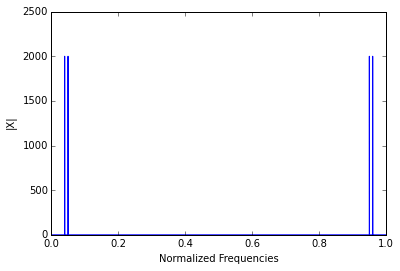

In [11]:
X = f.fft(x,M)
#Plot versus the normalized frequencies
normFrequ = np.arange(1,M+1,dtype=float)/float(M)
plot(normFrequ,abs(X))
ylabel('|X|'), xlabel('Normalized Frequencies')
show()

As expected, the spectrum shows the energy of the signal concentrated on two precise frequencies.
Let us now reduce the number of samples used to compute the DFS / DFT, and take for instance $M=500$:

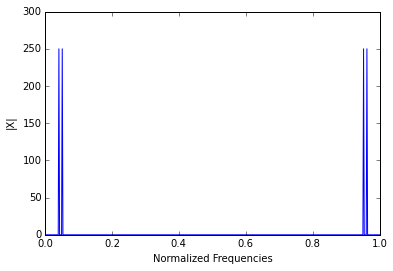

In [12]:
M = 500
X = f.fft(x,500)
#Plot versus the normalized frequencies
normFrequ = np.arange(1,M+1,dtype=float)/float(M)
plot(normFrequ,abs(X))
ylabel('|X|'), xlabel('Normalized Frequencies')
ylim([0,300])
show()

and $M=50$

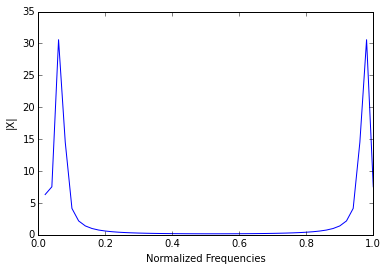

In [13]:
M = 50
X = f.fft(x,M)
#Plot versus the normalized frequencies
normFrequ = np.arange(1,M+1,dtype=float)/float(M)
plot(normFrequ,abs(X)), ylim([0,35])
ylabel('|X|'), xlabel('Normalized Frequencies')
show()

We can see that, as the number of samples decreases, it becomes more difficult to distignuish the two spectral lines that are on the contrary clearly visible on the DSF / DFT computed using all the 4000 samples. So the number of samples used to compute the DFS / DFT affects the resolution of the latter.

#### Zero Padding

As mentioned earlier, if $M<N$ the number of samples of the signal is increased to $N$ by adding zeros.

Since truncating decreases the resolution of the DFS / DFT, one might think that zero padding increases such a resolution. But we shall see that this is not the case...

So let's take the DFS / DFT computed using only 50 samples and reconstruct the signal using such a DFS / DFT.

In [14]:
M = 50
X = f.fft(x,M)   # X is of length 50
x50 = f.ifft(X)

where we have used here the inverse FFT function scipy.fftpack.ifft().

We have obtained a signal $x_{50}$ of $N=50$ samples and we compute the FFT with $M=4000$, that is, we zero pad the signal so as to have the initial number of samples before computing the FFT.

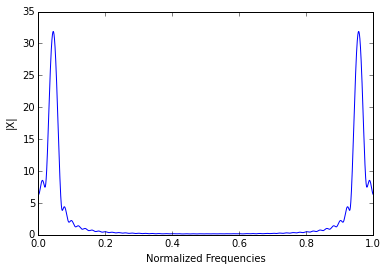

In [15]:
M = 4000
X = f.fft(x50,M)

#Plot versus the normalized Frequencies
normFrequ = np.arange(1,M+1,dtype=float)/float(M)
plot(normFrequ,abs(X))
ylabel('|X|'), xlabel('Normalized Frequencies')
show()

As shown in the plot, the two spectral lines are still not distinguishable even if the FFT has now been computed using 4000 samples.

### Labeling axes and taking into account maximum representable frequency

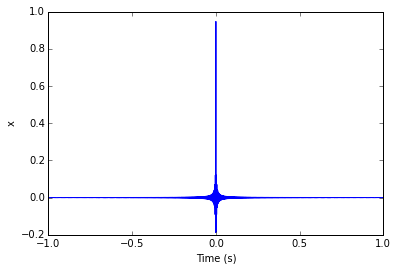

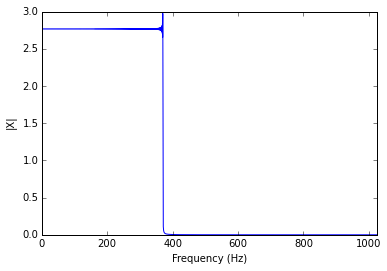

In [17]:
M = 4096
f0 = 740
Tmin= -1 # Time limits should not be directly related to the sampling frequency
Tmax = 1 # Observe that M/(Tmax-Tmin)must be at least 2f0
fs = M/(Tmax-Tmin)
t = np.linspace(Tmin,Tmax,M)

x = np.sinc(t*f0)
plot(t,x)
ylabel('x'), xlabel('Time (s)')
show()

X = f.fft(x,M)
#Plot versus the normalized frequencies
freqAxis = fs*np.arange(1,M+1,dtype=float)/float(M)
plot(freqAxis[0:M/2],abs(X[0:M/2])), xlim([0,fs/2])
ylabel('|X|'), xlabel('Frequency (Hz)')
show()